In [2]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import cv2
import numpy as np

MNIST DataSet

In [3]:
mnist = tf.keras.datasets.mnist

Training :- (60000, 28, 28)
Testing :- (10000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0

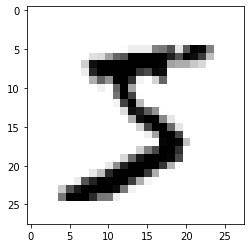

In [31]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
#28*28 sized imaged of 0-9
print(f'Training :- {x_train.shape}')
print(f'Testing :- {x_test.shape}')
plt.imshow(x_train[0], cmap=plt.cm.binary)
print(x_train[0])
# x=[]
# for i in range(0,28):
#     for j in range(0,28):
#         x.append(x_train[0,i,j])
# y = tuple(x)
# #print(y)
# plt.hist(y, bins=25, density=True, alpha=0.6, color='b')


Normalization :- converted between 0 and 1.
divided by 255 to make it a value from 0 to 1

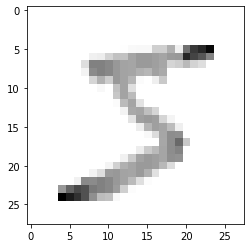

In [5]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)


(array([21.80748183,  0.48155323,  0.06879332,  0.27517327,  0.41275991,
         0.1719833 ,  0.41275991,  0.30956993,  0.82551982,  0.68793318,
         0.30956993,  0.41275991,  0.24077661,  0.06879332,  0.03439666,
         0.03439666,  0.03439666,  0.10318998,  0.03439666,  0.03439666,
         0.03439666,  0.06879332,  0.03439666,  0.        ,  0.06879332]),
 array([0.        , 0.03708239, 0.07416477, 0.11124716, 0.14832955,
        0.18541193, 0.22249432, 0.25957671, 0.29665909, 0.33374148,
        0.37082386, 0.40790625, 0.44498864, 0.48207102, 0.51915341,
        0.5562358 , 0.59331818, 0.63040057, 0.66748296, 0.70456534,
        0.74164773, 0.77873012, 0.8158125 , 0.85289489, 0.88997728,
        0.92705966]),
 <BarContainer object of 25 artists>)

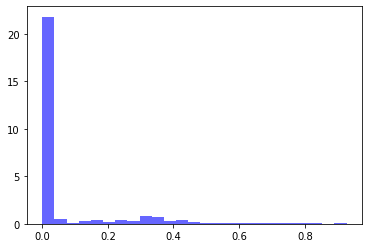

In [6]:
x=[]
for i in range(0,28):
    for j in range(0,28):
        x.append(x_train[0,i,j])
y = tuple(x)
plt.hist(y, bins=25, density=True, alpha=0.6, color='b')

Resizing the image to perform convolution layers on it .

In [7]:
x_trainr = np.array(x_train).reshape(-1,28,28,1)    #increasing one dimension for kernal operation.
x_testr = np.array(x_test).reshape(-1,28,28,1)    #increasing one dimension for kernal operation.
#-1 means the value that is still unknown
print(x_trainr.shape)
print(x_testr.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


Deep Learning Neural Network Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [9]:
#creating the model
model = Sequential()

#first convolution Layer
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))  #reduced the size for only first convolution layer
#filtered with 64 kernels with size 3,3
model.add(Activation('relu'))   #removes values less than zero and keeps >0 values
model.add(MaxPooling2D(pool_size=(2,2)))        
#from a matrix of 2x2 only maximum value is taken and as a result the original matrix is converted 
# to half it's value

#2nd convolution Layer
model.add(Conv2D(64,(3,3)))  
model.add(Activation('relu'))   
model.add(MaxPooling2D(pool_size=(2,2)))        

#3rd convolution Layer
model.add(Conv2D(64,(3,3)))  
model.add(Activation('relu'))   
model.add(MaxPooling2D(pool_size=(2,2)))   

In [10]:
#fully connected layers

# 1st fully connected layer
model.add(Flatten())    #to convert 2D array to 1D array
model.add(Dense(64))    #represents that each matrix is connected to 64 neurons
model.add(Activation('relu'))

#2nd fully connected layer
model.add(Dense(32))    #represents that each matrix is connected to 32 neurons
model.add(Activation('relu'))

#last fully connected layer
model.add(Dense(10))    #this must be equal to 10 beacuse we will be getting only 10 output values from 0-9
model.add(Activation('softmax'))    #softmax gives the class probabilities of each class

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [12]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [13]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)   
#Training the model.we divided the data in parts 30-70 where 30% is the validation data and rest is training data
#we did that to avoid overFiltting


Epoch 1/5
1313/1313 [==============================] - 40s 30ms/step - loss: 0.3526 - accuracy: 0.8905 - val_loss: 0.1361 - val_accuracy: 0.9578
Epoch 2/5
1313/1313 [==============================] - 38s 29ms/step - loss: 0.1128 - accuracy: 0.9652 - val_loss: 0.0870 - val_accuracy: 0.9724
Epoch 3/5
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0779 - accuracy: 0.9764 - val_loss: 0.0982 - val_accuracy: 0.9714
Epoch 4/5
1313/1313 [==============================] - 43s 32ms/step - loss: 0.0642 - accuracy: 0.9800 - val_loss: 0.0733 - val_accuracy: 0.9775
Epoch 5/5
1313/1313 [==============================] - 45s 34ms/step - loss: 0.0507 - accuracy: 0.9835 - val_loss: 0.0814 - val_accuracy: 0.9752


In [14]:
#Testing the model
test_loss , test_acc = model.evaluate(x_testr,y_test) 
print(test_loss)
print(test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.0768 - accuracy: 0.9755
0.07677622884511948
0.9754999876022339


Prdeictions

Example 1

In [15]:
predictions = model.predict([x_testr])
#print(predictions)
#the predictions are coming as the 10 classes .pick the max probability to get the answer
print(np.argmax(predictions[0]))
#model predicted the first test image as 7   

313/313 [==============================] - 6s 10ms/step
7


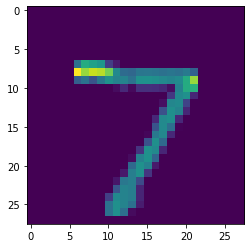

In [16]:
plt.imshow(x_test[0])   #so yes the model predicted right it is 7

Example 2

In [17]:
print(np.argmax(predictions[128]))

8


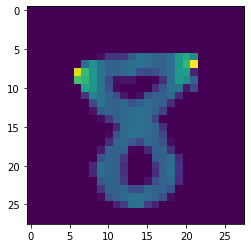

In [18]:
plt.imshow(x_test[128])

Example 3 : I made it through through paint PC

(648, 1152)
(28, 28)
(1, 28, 28, 1)


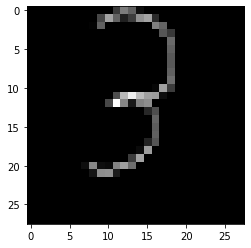

In [32]:
image = cv2.imread('three.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
print(gray.shape)   #324*576
#plt.imshow(gray)
resized_image = cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
print(resized_image.shape)  #28*28
plt.imshow(resized_image , cmap='gray')

#normalising the image as our model is based on that
normal_image = tf.keras.utils.normalize(resized_image,axis=1)   #for 0 to 1 scaling

#increasing the dimension for kernal convolution operation
newImg = np.array(normal_image).reshape(-1,28,28,1)
print(newImg.shape)


In [20]:
#let's predict

predictions = model.predict(newImg)
print(np.argmax(predictions))

1/1 [==============================] - 0s 145ms/step
3


Hurray

HANDWRITTEN EXAMPLE

Original Image

(1519, 1156, 3)


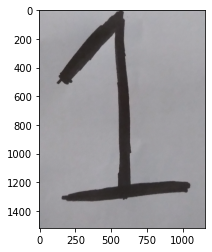

In [47]:
image = cv2.imread('one.jpg')
print(image.shape)
plt.imshow(image)

BGR to Gray Image

(1519, 1156)


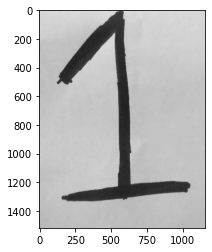

In [48]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray,cmap='gray')

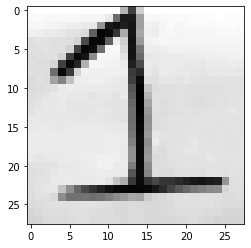

In [49]:
resized_image = cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
plt.imshow(resized_image,cmap='gray')

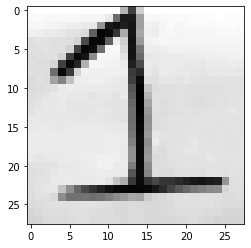

In [50]:
filtered_image = cv2.GaussianBlur(resized_image,(1,1),sigmaX=1,sigmaY=1)
plt.imshow(filtered_image,cmap='gray')

OTSU Threshold for edge detection and made black backgruond and white foreground

115.0


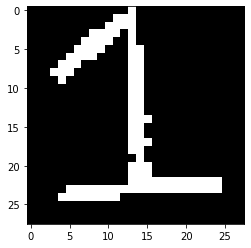

In [51]:
#Taking OTSU threshold and making the 
ret,otsu= cv2.threshold(src=filtered_image,thresh=0,maxval=255, type = cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)
print(ret)
plt.imshow(otsu,cmap='gray')

In [52]:
#normalising the image as our model is based on that
normal_image = tf.keras.utils.normalize(otsu,axis=1)   #for 0 to 1 scaling

#increasing the dimension for kernal convolution operation
newImg2 = np.array(normal_image).reshape(-1,28,28,1)
print(newImg.shape)


(1, 28, 28, 1)


In [53]:
predictions = model.predict(newImg2)
print(np.argmax(predictions))

1/1 [==============================] - 0s 32ms/step
1
